In [1]:
import numpy as np

import paperfig as pf
pf.set_fontscale(2.)

In [2]:
from getdist import plots
from getdist import MCSamples
import matplotlib.pyplot as plt
import matplotlib.colors as col

import seaborn as sns

In [3]:
savefig = False

In [4]:
# from https://stackoverflow.com/questions/21844024/weighted-percentile-using-numpy
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

## load saved parameter posteriors

In [5]:
#weight,td_ab,td_ac,td_ad

pl_fiducial = np.genfromtxt('../glee_tddata_nokext/glee_tddata_pl_fid.csv', skip_header=1, delimiter=',')
pl_agn_wht = np.genfromtxt('../glee_tddata_nokext/glee_tddata_pl_noagnwht.csv', skip_header=1, delimiter=',')
pl_agn_1px = np.genfromtxt('../glee_tddata_nokext/glee_tddata_pl_agn1p.csv', skip_header=1, delimiter=',')
pl_source_p10 = np.genfromtxt('../glee_tddata_nokext/glee_tddata_pl_src10p.csv', skip_header=1, delimiter=',')
pl_source_m10 = np.genfromtxt('../glee_tddata_nokext/glee_tddata_pl_src10m.csv', skip_header=1, delimiter=',')
pl_source_arcmask = np.genfromtxt('../glee_tddata_nokext/glee_tddata_pl_arcmask1p.csv', skip_header=1, delimiter=',')

comp_fiducial = np.genfromtxt('../glee_tddata_nokext/glee_tddata_comp_fid.csv', skip_header=1, delimiter=',')
comp_agn_wht = np.genfromtxt('../glee_tddata_nokext/glee_tddata_comp_noagnwht.csv', skip_header=1, delimiter=',')
comp_agn_1px = np.genfromtxt('../glee_tddata_nokext/glee_tddata_comp_agn1p.csv', skip_header=1, delimiter=',')
comp_source_p10 = np.genfromtxt('../glee_tddata_nokext/glee_tddata_comp_src10p.csv', skip_header=1, delimiter=',')
comp_source_m10 = np.genfromtxt('../glee_tddata_nokext/glee_tddata_comp_src10m.csv', skip_header=1, delimiter=',')
comp_source_arcmask = np.genfromtxt('../glee_tddata_nokext/glee_tddata_comp_arcmask1p.csv', skip_header=1, delimiter=',')

In [6]:
pl_tds =[
    pl_fiducial,
    pl_agn_wht,
    pl_agn_1px,
    pl_source_p10,
    pl_source_m10,
    pl_source_arcmask
]

comp_tds = [
    comp_fiducial,
    comp_agn_wht,
    comp_agn_1px,
    comp_source_p10,
    comp_source_m10,
    comp_source_arcmask,
]

labels =[
    'Fiducial',
    'AGN weight $= 0$',
    r'AGN mask $+$1 pixel',
    r'Source $-$10 pixel',
    r'Source $+$10 pixel',
    r'Arcmask $+$1 pixel'
]

In [7]:
pl_means = [np.sum(pl_fiducial[:, i]*pl_fiducial[:, 0])/np.sum(pl_fiducial[:, 0]) for i in range(1, 4)]
comp_means = [np.sum(comp_fiducial[:, i]*comp_fiducial[:, 0])/np.sum(comp_fiducial[:, 0]) for i in range(1, 4)]

In [8]:
colors = ['k', pf.cb2_orange, pf.cb2_emerald, pf.cb_purple, '#e7298a', '#66a61e']

ls = ['-', '--', '--', '--', '--', '--']
lw = [3., 1.6, 1.6, 1.6, 1.6, 1.6]
zorder = [-2, 1, 2, 3, 4, 5]

In [27]:
comp_tds[0].shape

(100000, 4)

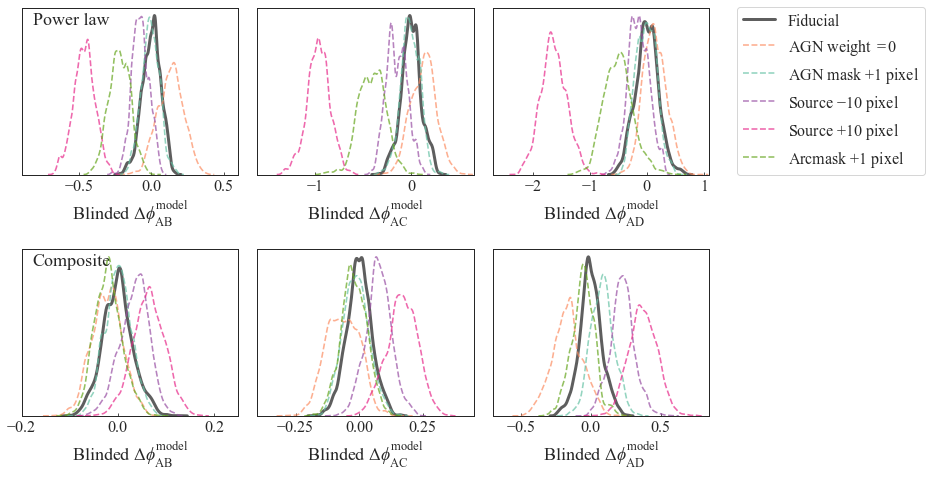

In [40]:
fig, axes = plt.subplots(2, 4, figsize=pf.get_fig_size(width=pf.mnras_textwidth*2, height_ratio=0.5))

smoothing = None
alpha = 0.7

for i in range(6):
    td, l = pl_tds[i], labels[i]
    
    size = 10000
    indices = np.random.choice(np.arange(td.shape[0]), size=size, p=td[:, 0]/np.sum(td[:, 0]))
    
    #sns.kdeplot(td[:, 1] - comp_means[0], weights=td[:, 0], alpha=alpha, label=l,
    sns.kdeplot(td[indices, 1] - pl_means[0], alpha=alpha, label=l,
                ax=axes[0, 0], color=colors[i], linestyle=ls[i], lw=lw[i], zorder=zorder[i],
                bw_method=smoothing
               )
    
    #sns.kdeplot(td[:, 2] - comp_means[1], weights=td[:, 0],  alpha=alpha, label=l,
    sns.kdeplot(td[indices, 2] - pl_means[1],  alpha=alpha, label=l,
                ax=axes[0, 1], color=colors[i], linestyle=ls[i], lw=lw[i], zorder=zorder[i],
                bw_method=smoothing
               )
    
    #sns.kdeplot(td[:, 3] - comp_means[2], weights=td[:, 0],  alpha=alpha, label=l,
    sns.kdeplot(td[indices, 3] - pl_means[2],  alpha=alpha, label=l,
                ax=axes[0, 2], color=colors[i], linestyle=ls[i], lw=lw[i], zorder=zorder[i],
                bw_method=smoothing)
    
    for ax in [axes[0, 0], axes[0, 1], axes[0, 2]]:
        ax.set_yticks([])
        ax.set_ylabel('')
        
axes[0, 0].text(0.05, 0.9, 'Power law', transform=axes[0, 0].transAxes)
handles, labels = axes[0, 2].get_legend_handles_labels()
axes[0, 3].legend(handles, labels, loc='center left')
axes[0, 3].axis('off')


smoothing = None

for i in range(6):
    td, l = comp_tds[i], labels[i]
    
    size = 10000
    indices = np.random.choice(np.arange(td.shape[0]), size=size, p=td[:, 0]/np.sum(td[:, 0]))
    
    #sns.kdeplot(td[:, 1] - comp_means[0], weights=td[:, 0], alpha=alpha, label=l,
    sns.kdeplot(td[indices, 1] - comp_means[0], alpha=alpha, label=l,
                ax=axes[1, 0], color=colors[i], linestyle=ls[i], lw=lw[i], zorder=zorder[i],
                bw_method=smoothing
               )
    
    #sns.kdeplot(td[:, 2] - comp_means[1], weights=td[:, 0],  alpha=alpha, label=l,
    sns.kdeplot(td[indices, 2] - comp_means[1],  alpha=alpha, label=l,
                ax=axes[1, 1], color=colors[i], linestyle=ls[i], lw=lw[i], zorder=zorder[i],
                bw_method=smoothing
               )
    
    #sns.kdeplot(td[:, 3] - comp_means[2], weights=td[:, 0],  alpha=alpha, label=l,
    sns.kdeplot(td[indices, 3] - comp_means[2],  alpha=alpha, label=l,
                ax=axes[1, 2], color=colors[i], linestyle=ls[i], lw=lw[i], zorder=zorder[i],
                bw_method=smoothing
               )
    
    for ax in [axes[1, 0], axes[1, 1], axes[1, 2]]:
        ax.set_yticks([])
        ax.set_ylabel('')
        
axes[1, 0].text(0.05, 0.9, 'Composite', transform=axes[1, 0].transAxes)
# handles, labels = axes[1, 2].get_legend_handles_labels()
# axes[1, 3].legend(handles, labels, loc='center left')
axes[1, 3].axis('off')

        
axes[0, 0].set_xlim(-0.9, 0.6)
axes[0, 1].set_xlim(-1.6, 0.65)
axes[0, 2].set_xlim(-2.7, 1.1)


axes[1, 0].set_xlim(-.2, .25)
axes[1, 1].set_xlim(-0.4, 0.45)
axes[1, 2].set_xlim(-0.7, 0.85)

axes[0, 0].set_xlabel(r'Blinded $\Delta \phi_{\rm AB}^{\rm model}$')
axes[0, 1].set_xlabel(r'Blinded $\Delta \phi_{\rm AC}^{\rm model}$')
axes[0, 2].set_xlabel(r'Blinded $\Delta \phi_{\rm AD}^{\rm model}$')

axes[1, 0].set_xlabel(r'Blinded $\Delta \phi_{\rm AB}^{\rm model}$')
axes[1, 1].set_xlabel(r'Blinded $\Delta \phi_{\rm AC}^{\rm model}$')
axes[1, 2].set_xlabel(r'Blinded $\Delta \phi_{\rm AD}^{\rm model}$')

fig.tight_layout()

In [41]:
fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/2038_model/figures/glee_model_systematic_tests.pdf',
            bbox_inches='tight'
           )